<a href="https://colab.research.google.com/github/yuki-tamaribuchi/ml_code_kata/blob/master/iris_meanshift_default.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import sklearn
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.cluster import MeanShift
from sklearn import metrics

In [2]:
iris=load_iris()

In [3]:
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [4]:
iris_df=pd.DataFrame(iris.data,columns=iris.feature_names)

In [5]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
ms=MeanShift()

In [7]:
ms.fit(iris_df)

MeanShift(bandwidth=None, bin_seeding=False, cluster_all=True, max_iter=300,
          min_bin_freq=1, n_jobs=None, seeds=None)

In [8]:
import pylab as pl
from sklearn.decomposition import PCA

In [9]:
pca=PCA(n_components=2).fit(iris_df)
pca_2d=pca.transform(iris_df)
pl.figure('Figure 13-7')

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

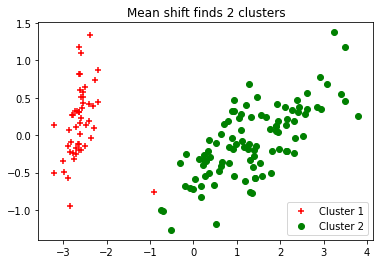

In [10]:
for i in range(0,pca_2d.shape[0]):
  if ms.labels_[i]==1:
    c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r',marker='+')
  elif ms.labels_[i]==0:
    c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g',marker='o')
pl.legend([c1, c2], ['Cluster 1', 'Cluster 2'])
pl.title('Mean shift finds 2 clusters')
pl.show()
                     